# 第６章：機械学習

## 50.データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
file_name = "newsCorpora.csv"
# コーパスを列ラベル付きにしてDataFrame形式で保存
df = pd.read_csv(file_name, sep='\t', header=None, names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

In [3]:
df[:5]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [6]:
df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"])

0         False
1         False
2         False
3         False
4         False
          ...  
422414    False
422415    False
422416    False
422417    False
422418    False
Name: PUBLISHER, Length: 422419, dtype: bool

In [3]:
# "PUBLISHER"列が"Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"のみを抽出
df = df[df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"])]
print(df)

            ID                                              TITLE  \
12          13       Europe reaches crunch point on banking union   
13          14  ECB FOCUS-Stronger euro drowns out ECB's messa...   
19          20  Euro Anxieties Wane as Bunds Top Treasuries, S...   
20          21  Noyer Says Strong Euro Creates Unwarranted Eco...   
29          30  REFILE-Bad loan triggers key feature in ECB ba...   
...        ...                                                ...   
422300  422819     UN: Ebola Could Eventually Infect 20000 People   
422301  422820  Ebola toll tops 1550, continues to accelerate ...   
422302  422821  UPDATE 1-Ebola toll tops 1550, outbreak accele...   
422309  422828  Ebola Cases May Surpass 20000, WHO Says in Upd...   
422319  422838  Air France suspends flights to Ebola-hit Sierr...   

                                                      URL        PUBLISHER  \
12      http://in.reuters.com/article/2014/03/10/eu-ba...          Reuters   
13      http://

In [4]:
train,val_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df['CATEGORY'])
valid, test = train_test_split(val_test, test_size=0.5, random_state=42, shuffle=True, stratify=val_test['CATEGORY'])

In [5]:
train[["CATEGORY", "TITLE"]].to_csv('./data/train.txt', sep='\t', index=False)
valid[["CATEGORY", "TITLE"]].to_csv('./data/valid.txt', sep='\t', index=False)
test[["CATEGORY", "TITLE"]].to_csv('./data/test.txt', sep='\t', index=False)

In [6]:
print("-----train-----")
print(train["CATEGORY"].value_counts())
print("-----valid-----")
print(valid["CATEGORY"].value_counts())
print("-----test-----")
print(test["CATEGORY"].value_counts())

-----train-----
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
-----valid-----
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
-----test-----
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


## 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [8]:
import string
import re

In [10]:
def preprocessing_text(text):
    for p in string.punctuation:
        text = text.replace(p, " ") 
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    return text

In [11]:
train['TITLE'] = train['TITLE'].map(preprocessing_text)
valid['TITLE'] = valid['TITLE'].map(preprocessing_text)
test['TITLE'] = test['TITLE'].map(preprocessing_text)

### CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

In [16]:
train_count = vectorizer.fit_transform(train['TITLE'])
valid_count = vectorizer.transform(valid['TITLE'])
test_count = vectorizer.transform(test['TITLE'])

In [14]:
print(test_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
train_count = pd.DataFrame(train_count.toarray(), columns=vectorizer.get_feature_names_out())
valid_count = pd.DataFrame(valid_count.toarray(), columns=vectorizer.get_feature_names_out())
test_count = pd.DataFrame(test_count.toarray(), columns=vectorizer.get_feature_names_out())

MemoryError: Unable to allocate 127. GiB for an array with shape (337935, 50447) and data type int64

In [57]:
train_count.to_csv('./data_count/train.feature.txt', sep='\t', index=False)
valid_count.to_csv('./data_count/valid.feature.txt', sep='\t', index=False)
test_count.to_csv('./data_count/test.feature.txt', sep='\t', index=False)

In [116]:
train_count.loc[0][train_count.loc[0]>0]

and           1
birthday      1
celebrates    1
daughter      1
day           1
father        1
first         1
kanye         2
west          2
Name: 0, dtype: int64

### tf-idf

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vectorizer = TfidfVectorizer()

In [121]:
train_tfidf = vectorizer.fit_transform(train['TITLE'])
valid_tfidf = vectorizer.transform(valid['TITLE'])
test_tfidf = vectorizer.transform(test['TITLE'])

In [82]:
vectorizer


TfidfVectorizer()

In [122]:
train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
valid_tfidf = pd.DataFrame(valid_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf = pd.DataFrame(test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [84]:
train_tfidf.to_csv('./data_tfidf/train.feature.txt', sep='\t', index=False)
valid_tfidf.to_csv('./data_tfidf/valid.feature.txt', sep='\t', index=False)
test_tfidf.to_csv('./data_tfidf/test.feature.txt', sep='\t', index=False)

## 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ

In [3]:
# ラベル（カテゴリ）抽出
train_y = pd.read_csv('./data/train.txt', sep='\t')
valid_y = pd.read_csv('./data/valid.txt', sep='\t')
test_y = pd.read_csv('./data/test.txt', sep='\t')

In [5]:
# 特徴量抽出
train_x = pd.read_csv('./data_count/train.feature.txt', sep='\t')
valid_x = pd.read_csv('./data_count/valid.feature.txt', sep='\t')
test_x = pd.read_csv('./data_count/test.feature.txt', sep='\t')

In [4]:
train_y = train_y["CATEGORY"]
valid_y = valid_y["CATEGORY"]
test_y = test_y["CATEGORY"]

In [6]:
# モデル学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(train_x, train_y)

C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [7]:
import pickle

#学習モデルの保存
with open('model.pickle', mode='wb') as f:
    pickle.dump(model,f,protocol=2)

## 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ

In [168]:
model.predict(valid_count)

array(['b', 'b', 'b', ..., 'e', 'b', 'b'], dtype=object)

In [104]:
model.predict_proba(valid_count)

C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.6032107 , 0.26781757, 0.05719794, 0.0717738 ],
       [0.98315223, 0.00714263, 0.00546352, 0.00424162],
       [0.62791999, 0.1946964 , 0.04538893, 0.13199468],
       ...,
       [0.06303454, 0.87489556, 0.0308467 , 0.03122321],
       [0.98030861, 0.0100075 , 0.00357099, 0.00611291],
       [0.97984676, 0.00751316, 0.00421809, 0.00842199]])

In [105]:
import numpy as np
def score(model, texts):
    probs = model.predict_proba(texts).max(axis=1)
    preds = model.predict(texts)
    return np.stack([probs, preds],axis=1)

In [106]:
score(model, valid_count)

array([[0.603210696029133, 'b'],
       [0.9831522260237566, 'b'],
       [0.6279199873936484, 'b'],
       ...,
       [0.8748955559406222, 'e'],
       [0.9803086054175252, 'b'],
       [0.979846763824319, 'b']], dtype=object)

## 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [119]:
from sklearn.metrics import accuracy_score

pred_y_train = model.predict(train_count)
pred_y_test = model.predict(test_count)
print(f"train_accuracy：{accuracy_score(train_y, pred_y_train)}")
print(f"test_accuracy：{accuracy_score(test_y, pred_y_test)}")

train_accuracy：0.9960644677661169
test_accuracy：0.9265367316341829


In [123]:
from sklearn.metrics import accuracy_score
 
pred_y_train = model.predict(train_tfidf)
pred_y_test = model.predict(test_tfidf)
print(f"train_accuracy：{accuracy_score(train_y, pred_y_train)}")
print(f"test_accuracy：{accuracy_score(test_y, pred_y_test)}")

train_accuracy：0.8638493253373314
test_accuracy：0.8500749625187406


## 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [8]:
import pickle

# モデルのオープン
with open('model.pickle', mode='rb') as f:
    model = pickle.load(f)

In [15]:
from sklearn.metrics import confusion_matrix
y_true_train = train_y
y_pred_train = model.predict(train_x)

y_true_test = test_y
y_pred_test = model.predict(test_x)

In [20]:
cm_train = confusion_matrix(y_true_train, y_pred_train)
cm_test = confusion_matrix(y_true_test, y_pred_test)

print(cm_train)
print(cm_test)

[[4488    3    1   10]
 [   6 4215    1    1]
 [   2    1  725    0]
 [  13    4    0 1202]]
[[542  10   1  10]
 [  8 519   0   1]
 [ 12  11  66   2]
 [ 25  16   2 109]]


## 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [24]:
from sklearn.metrics import classification_report
print(pd.DataFrame(classification_report(y_true_train, y_pred_train, output_dict=True)))

print(pd.DataFrame(classification_report(y_true_test, y_pred_test, output_dict=True)))

                     b            e           m            t  accuracy  \
precision     0.995343     0.998106    0.997249     0.990932  0.996064   
recall        0.996890     0.998106    0.995879     0.986054  0.996064   
f1-score      0.996116     0.998106    0.996564     0.988487  0.996064   
support    4502.000000  4223.000000  728.000000  1219.000000  0.996064   

              macro avg  weighted avg  
precision      0.995407      0.996062  
recall         0.994232      0.996064  
f1-score       0.994818      0.996062  
support    10672.000000  10672.000000  
                    b           e          m           t  accuracy  \
precision    0.923339    0.933453   0.956522    0.893443  0.926537   
recall       0.962700    0.982955   0.725275    0.717105  0.926537   
f1-score     0.942609    0.957565   0.825000    0.795620  0.926537   
support    563.000000  528.000000  91.000000  152.000000  0.926537   

             macro avg  weighted avg  
precision     0.926689      0.926199  


In [26]:
pd.DataFrame(classification_report(y_true_train, y_pred_train, output_dict=True))

,b,e,m,t,accuracy,macro avg,weighted avg
precision,0.995343,0.998106,0.997249,0.990932,0.996064,0.995407,0.996062
recall,0.996890,0.998106,0.995879,0.986054,0.996064,0.994232,0.996064
f1-score,0.996116,0.998106,0.996564,0.988487,0.996064,0.994818,0.996062
support,4502.000000,4223.000000,728.000000,1219.000000,0.996064,10672.000000,10672.000000


## 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [32]:
coef = pd.DataFrame(model.coef_)

In [99]:
coef.loc[i].sort_values()[-10:].index.values

array([ 4070, 11135,  7370,   139,  5087,  7013,  2112,   570,  4744,
        3967], dtype=int64)

In [104]:
model.classes_

array(['b', 'e', 'm', 't'], dtype=object)

In [108]:
features = train_x.columns
print("top10")
for i in range(4):
    top10 = coef.loc[i].sort_values()[-10:].index.values
    print(model.classes_[i], features[top10][::-1].values)
    print("-"*20)

print("worst10")
for i in range(4):
    worst10 = coef.loc[i].sort_values()[:10].index.values
    print(model.classes_[i], features[worst10].values)
    print("-"*20)

top10
b ['bank' 'fed' 'ecb' 'obamacare' 'china' 'ukraine' 'oil' 'dollar' 'buy'
 'yellen']
--------------------
e ['chris' 'kardashian' 'thrones' 'paul' 'transformers' 'movie' 'cyrus'
 'miley' 'george' 'kim']
--------------------
m ['ebola' 'cancer' 'fda' 'mers' 'study' 'cases' 'drug' 'doctors'
 'cigarettes' 'cdc']
--------------------
t ['facebook' 'google' 'apple' 'climate' 'microsoft' 'heartbleed'
 'activision' 'nasa' 'tesla' 'fcc']
--------------------
worst10
b ['activision' 'aereo' 'ebola' 'twitch' 'subscription' 'cap' 'she'
 'heartbleed' 'nintendo' 'her']
--------------------
e ['google' 'billion' 'gm' 'facebook' 'china' 'ceo' 'study' 'ebola' 'data'
 'risk']
--------------------
m ['gm' 'facebook' 'climate' 'twitter' 'apple' 'netflix' 'amazon' 'cyrus'
 'miley' 'buy']
--------------------
t ['percent' 'stocks' 'grows' 'expands' 'valued' 'american' 'thrones'
 'should' 'drug' 'home']
--------------------


# 58 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# ラベル（カテゴリ）抽出
train_y = pd.read_csv('./data/train.txt', sep='\t')
valid_y = pd.read_csv('./data/valid.txt', sep='\t')
test_y = pd.read_csv('./data/test.txt', sep='\t')

train_y = train_y["CATEGORY"]
valid_y = valid_y["CATEGORY"]
test_y = test_y["CATEGORY"]

# 特徴量抽出
train_x = pd.read_csv('./data_count/train.feature.txt', sep='\t')
valid_x = pd.read_csv('./data_count/valid.feature.txt', sep='\t')
test_x = pd.read_csv('./data_count/test.feature.txt', sep='\t')

In [6]:
train_acc, valid_acc, test_acc = [], [], []
C = [10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]

In [11]:
for c in C:
    model = LogisticRegression(random_state=42, C=c)
    model.fit(train_x, train_y)
    train_acc.append(accuracy_score(train_y, model.predict(train_x)))
    valid_acc.append(accuracy_score(valid_y, model.predict(valid_x)))
    test_acc.append(accuracy_score(test_y, model.predict(test_x)))

C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

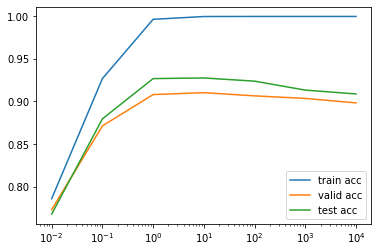

In [19]:
plt.plot(C, train_acc, label='train acc')
plt.plot(C, valid_acc, label='valid acc')
plt.plot(C, test_acc, label='test acc')
plt.xscale('log')
plt.legend()
plt.savefig("58.png")

# 59 ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

0.9100449775112444
l2
10.0


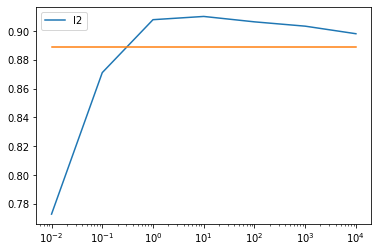

In [26]:
penalty_list = ["l2", None]
C = [10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
max_acc = 0.0
for penalty in penalty_list:
    train_acc, valid_acc, test_acc = [], [], []
    for c in C:
        model = LogisticRegression(random_state=42, C=c, penalty=penalty)
        model.fit(train_x, train_y)
        acc = accuracy_score(valid_y, model.predict(valid_x))
        valid_acc.append(acc)
        if acc>max_acc:
            max_acc=acc
            algo = penalty
            param_c = c
    plt.plot(C, valid_acc, label=penalty)
    plt.xscale('log')
    plt.legend()
    
print(max_acc)
print(algo)
print(param_c)